<a href="https://colab.research.google.com/github/damiangarmol/TFG_codigo/blob/main/neural_network_tfg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Red Neuronal - Índices Bursátiles Mundiales

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/global_index_excel.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['SP500', 'NASDAQ100', 'MOEX_RUSSIA', 'PFTS_UKRAINE', 'CSI_CHINA']

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(650, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=150, batch_size=75)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Realizar predicción de las próximas 100 observaciones
last_window = scaled_values[-window_size:, :]
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(data['Date'][-len(future_predictions):], future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil')
plt.title('Valores Bursátiles')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/150
18/18 [==============================] - 15s 753ms/step - loss: 0.0849
Epoch 2/150
18/18 [==============================] - 13s 751ms/step - loss: 0.0327
Epoch 3/150
18/18 [==============================] - 13s 743ms/step - loss: 0.0067
Epoch 4/150
18/18 [==============================] - 14s 775ms/step - loss: 0.0025
Epoch 5/150
18/18 [==============================] - 13s 754ms/step - loss: 0.0017
Epoch 6/150
18/18 [==============================] - 13s 746ms/step - loss: 0.0013
Epoch 7/150
18/18 [==============================] - 17s 944ms/step - loss: 0.0012
Epoch 8/150
18/18 [==============================] - 14s 763ms/step - loss: 0.0012
Epoch 9/150
18/18 [==============================] - 14s 754ms/step - loss: 0.0011
Epoch 10/150
18/18 [==============================] - 14s 752ms/step - loss: 0.0010
Epoch 11/150
18/18 [==============================] - 13s 740ms/step - loss: 0.0010
Epoch 12/150
18/18 [==============================] - 13s 750ms/step - loss: 9.8660e-

#NN Prueba 1 (Válido)



In [42]:
# Cargar los datos desde un archivo Excel
global_index = pd.read_excel('/content/global_index_excel.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns_index = ['SP500', 'NASDAQ100', 'MOEX_RUSSIA', 'PFTS_UKRAINE', 'CSI_CHINA']
print(global_index)

           Date    SP500  NASDAQ100  MOEX_RUSSIA  PFTS_UKRAINE  CSI_CHINA
0    2015-01-06  2002.61    4110.83      1480.73        393.57    6172.39
1    2015-01-08  2062.14    4240.55      1547.39        393.43    6164.11
2    2015-01-09  2044.81    4213.28      1515.37        394.38    6128.01
3    2015-01-12  2028.26    4169.97      1513.22        400.78    6062.28
4    2015-01-13  2023.03    4166.20      1533.09        408.40    6167.12
...         ...      ...        ...          ...           ...        ...
1709 2022-12-28  3783.22   10679.34      2139.77        519.20    6270.94
1710 2022-12-29  3849.28   10951.05      2147.06        519.20    6263.09
1711 2022-12-30  3839.50   10939.76      2154.12        519.20    6281.68
1712 2023-01-03  3824.14   10862.64      2172.68        519.20    6425.63
1713 2023-01-04  3828.87   10914.80      2166.96        519.20    6420.41

[1714 rows x 6 columns]


In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
global_index = pd.read_excel('/content/global_index_excel.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns_index = ['SP500', 'NASDAQ100', 'MOEX_RUSSIA', 'PFTS_UKRAINE', 'CSI_CHINA']

# Obtener los valores de las empresas como una matriz 2D
values_index = global_index[company_columns_index].values

# Normalizar los datos
scaler_index = MinMaxScaler(feature_range=(0, 1))
scaled_values_index = scaler.fit_transform(values_index)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values_index[:train_size], scaled_values_index[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(600, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=150, batch_size=75)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(50):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=50)

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Valores Bursátiles (2015 - 2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Epoch 1/150


ValueError: ignored

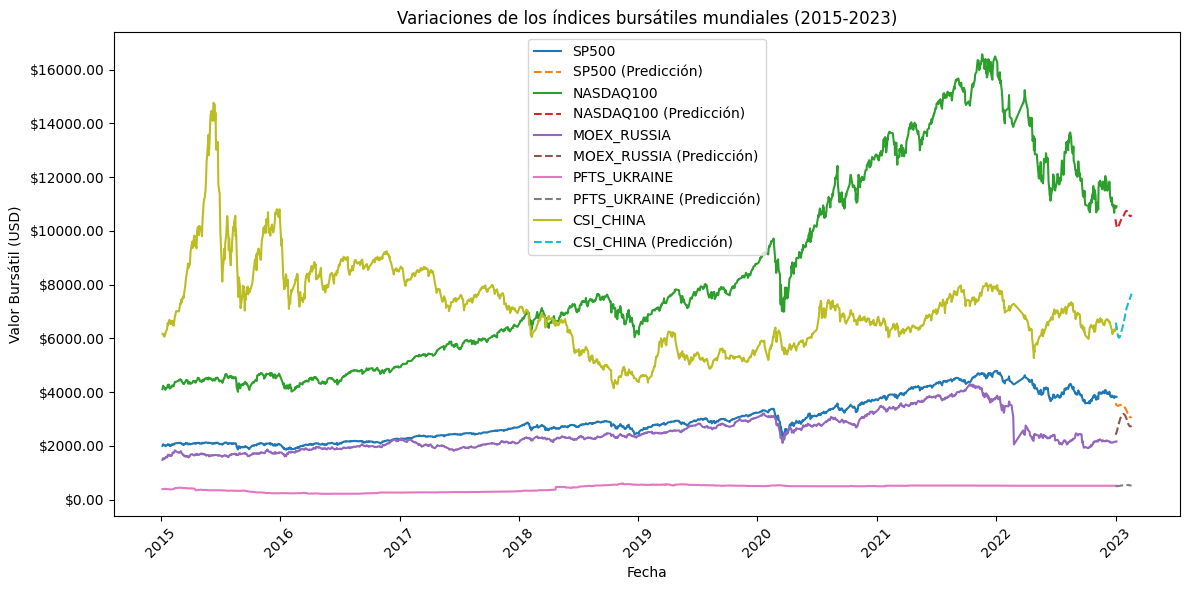

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Variaciones de los índices bursátiles mundiales (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Red Neuronal - Industrias INVUS 500


In [28]:
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])
print(data)

           Date  Utilities Industry  Real Estate Industry  Materials Industry  \
0    2015-01-02           51.013929             88.483929           66.312500   
1    2015-01-05           50.316071             88.751786           64.615833   
2    2015-01-06           50.302143             89.506429           64.208750   
3    2015-01-07           50.901071             90.783571           64.844167   
4    2015-01-08           51.265357             91.261071           66.495833   
...         ...                 ...                   ...                 ...   
2022 2023-01-13           76.370000            135.627500          141.840833   
2023 2023-01-17           76.150000            135.671429          140.597917   
2024 2023-01-18           74.306429            133.139286          138.881667   
2025 2023-01-19           73.628214            132.716071          136.945417   
2026 2023-01-20           74.267857            134.299286          140.247917   

      Information Technolog

Epoch 1/60
32/32 [==============================] - 4s 95ms/step - loss: 0.0267
Epoch 2/60
32/32 [==============================] - 2s 77ms/step - loss: 0.0024
Epoch 3/60
32/32 [==============================] - 3s 78ms/step - loss: 0.0014
Epoch 4/60
32/32 [==============================] - 3s 78ms/step - loss: 9.8232e-04
Epoch 5/60
32/32 [==============================] - 3s 80ms/step - loss: 8.8210e-04
Epoch 6/60
32/32 [==============================] - 3s 93ms/step - loss: 8.0061e-04
Epoch 7/60
32/32 [==============================] - 3s 79ms/step - loss: 7.3470e-04
Epoch 8/60
32/32 [==============================] - 3s 79ms/step - loss: 7.4581e-04
Epoch 9/60
32/32 [==============================] - 2s 78ms/step - loss: 6.7108e-04
Epoch 10/60
32/32 [==============================] - 3s 94ms/step - loss: 6.5016e-04
Epoch 11/60
32/32 [==============================] - 3s 79ms/step - loss: 6.2570e-04
Epoch 12/60
32/32 [==============================] - 2s 77ms/step - loss: 6.3192e-04
E

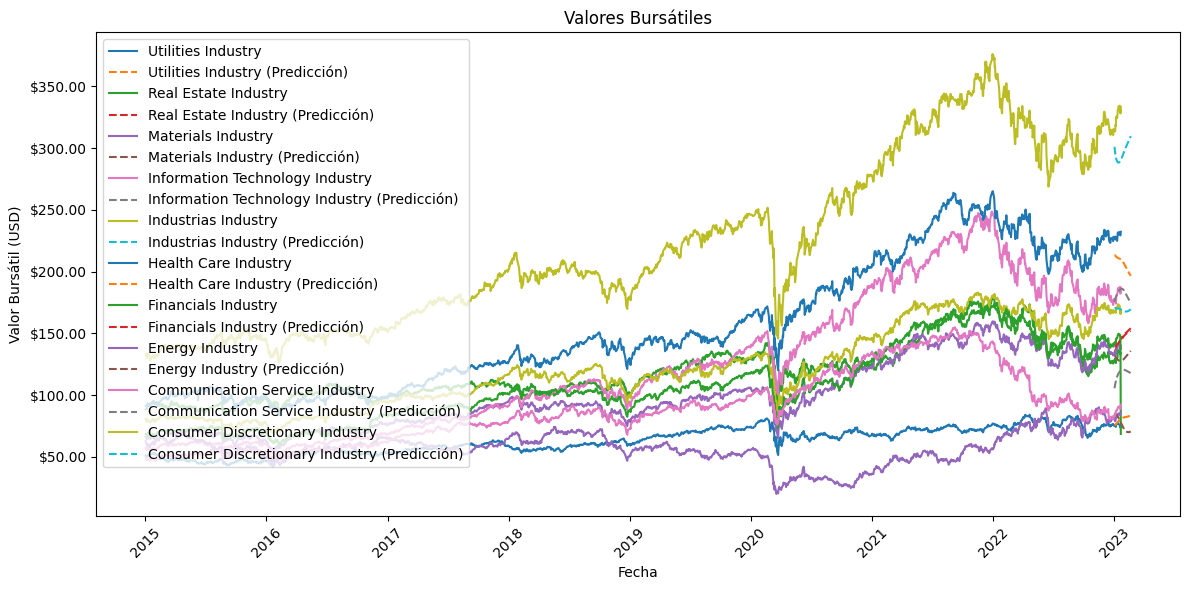

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Utilities Industry', 'Real Estate Industry', 'Materials Industry', 'Information Technology Industry', 'Industrias Industry',
                   'Health Care Industry', 'Financials Industry', 'Energy Industry', 'Communication Service Industry', 'Consumer Discretionary Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(50):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=50)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Valores Bursátiles')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


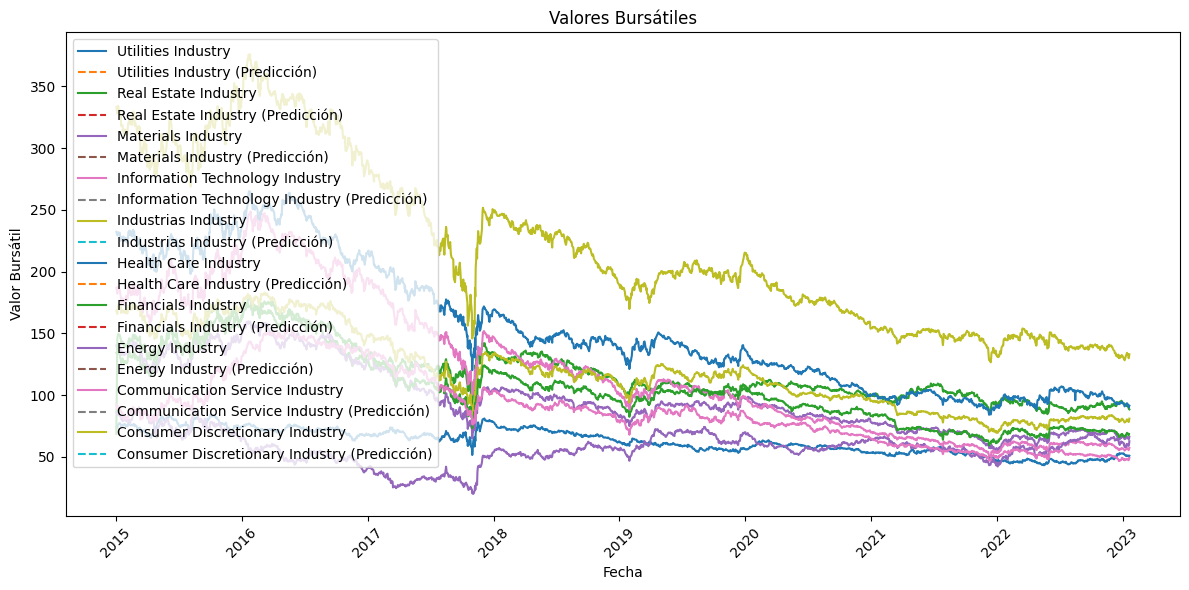

In [47]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil')
plt.title('Valores Bursátiles')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Valores Bursátiles')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###PRUEBA 1


In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
INVUS500 = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns_indux = [
    'Utilities Industry',
    'Real Estate Industry',
    'Materials Industry',
    'Information Technology Industry',
    'Industrias Industry',
    'Health Care Industry',
    'Financials Industry',
    'Energy Industry',
    'Communication Service Industry',
    'Consumer Discretionary Industry'
]

# Obtener los valores de las empresas como una matriz 2D
values_indux = INVUS500[company_columns_indux].values

# Normalizar los datos
scaler_indux = MinMaxScaler(feature_range=(0, 1))
scaled_values_indux = scaler_indux.fit_transform(values_indux)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values_indux) * 0.8)
train_data, test_data = scaled_values_indux[:train_size], scaled_values_indux[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(INVUS500, window_size):
    X, y = [], []
    for i in range(len(INVUS500) - window_size - 1):
        X.append(INVUS500[i:(i + window_size), :])
        y.append(INVUS500[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(150, activation='relu', input_shape=(window_size, len(company_columns_indux))),
    tf.keras.layers.Dense(len(company_columns_indux))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=35)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler_indux.inverse_transform(train_predictions)
y_train = scaler_indux.inverse_transform(y_train)
test_predictions = scaler_indux.inverse_transform(test_predictions)
y_test = scaler_indux.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values_indux[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(50):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns_indux)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler_indux.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns_indux)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=50)

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns_indux):
    plt.plot(global_index['Date'], values_indux[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Valores Bursátiles')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Epoch 1/50
46/46 [==============================] - 3s 30ms/step - loss: 0.0229
Epoch 2/50
46/46 [==============================] - 1s 30ms/step - loss: 0.0015
Epoch 3/50
46/46 [==============================] - 1s 30ms/step - loss: 9.4616e-04
Epoch 4/50
46/46 [==============================] - 2s 51ms/step - loss: 8.1125e-04
Epoch 5/50
46/46 [==============================] - 1s 30ms/step - loss: 7.6381e-04
Epoch 6/50
46/46 [==============================] - 1s 31ms/step - loss: 7.1213e-04
Epoch 7/50
46/46 [==============================] - 2s 43ms/step - loss: 6.7300e-04
Epoch 8/50
46/46 [==============================] - 1s 30ms/step - loss: 6.5350e-04
Epoch 9/50
46/46 [==============================] - 1s 30ms/step - loss: 5.8652e-04
Epoch 10/50
46/46 [==============================] - 1s 31ms/step - loss: 5.7292e-04
Epoch 11/50
46/46 [==============================] - 2s 49ms/step - loss: 5.5402e-04
Epoch 12/50
46/46 [==============================] - 3s 62ms/step - loss: 5.3024e-

KeyboardInterrupt: ignored

##Consumer Discretionary Industry


Epoch 1/60
36/36 [==============================] - 13s 268ms/step - loss: 0.0169
Epoch 2/60
36/36 [==============================] - 9s 243ms/step - loss: 7.3797e-04
Epoch 3/60
36/36 [==============================] - 10s 282ms/step - loss: 5.2269e-04
Epoch 4/60
36/36 [==============================] - 9s 237ms/step - loss: 5.2358e-04
Epoch 5/60
36/36 [==============================] - 8s 217ms/step - loss: 4.8647e-04
Epoch 6/60
36/36 [==============================] - 9s 241ms/step - loss: 4.5365e-04
Epoch 7/60
36/36 [==============================] - 10s 271ms/step - loss: 4.3579e-04
Epoch 8/60
36/36 [==============================] - 9s 236ms/step - loss: 4.1356e-04
Epoch 9/60
36/36 [==============================] - 8s 220ms/step - loss: 3.9416e-04
Epoch 10/60
36/36 [==============================] - 8s 231ms/step - loss: 3.7154e-04
Epoch 11/60
36/36 [==============================] - 8s 227ms/step - loss: 4.1211e-04
Epoch 12/60
36/36 [==============================] - 9s 259ms/st

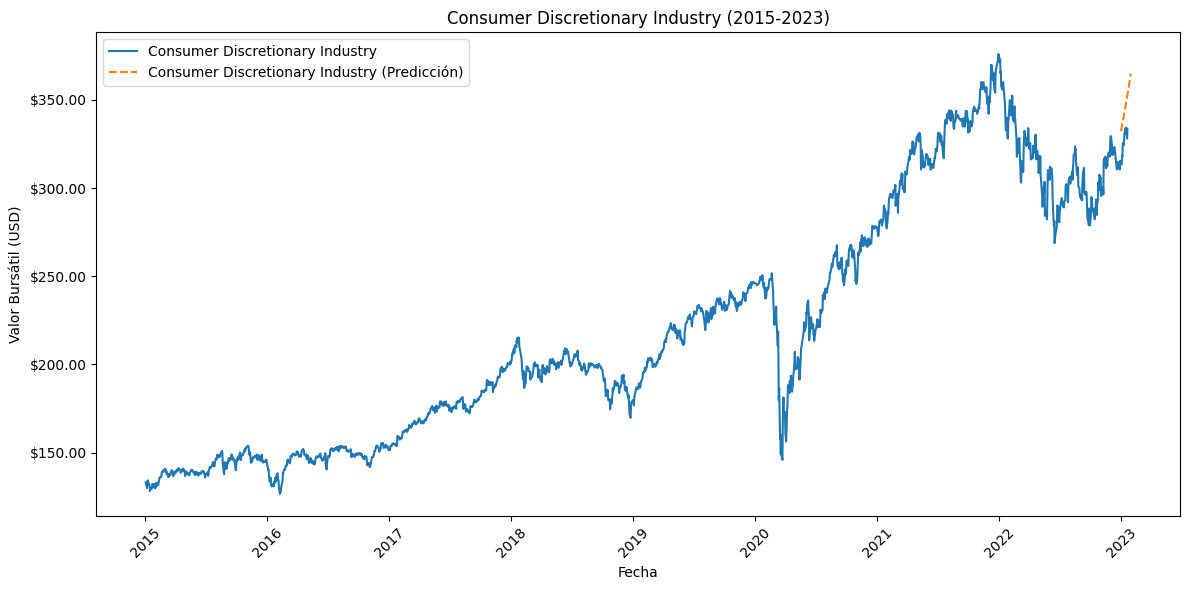

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Consumer Discretionary Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=45)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=30)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Consumer Discretionary Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Consumer Staples Industry

Epoch 1/60
32/32 [==============================] - 7s 141ms/step - loss: 0.0235
Epoch 2/60
32/32 [==============================] - 6s 171ms/step - loss: 9.9020e-04
Epoch 3/60
32/32 [==============================] - 4s 140ms/step - loss: 6.0769e-04
Epoch 4/60
32/32 [==============================] - 5s 169ms/step - loss: 5.9371e-04
Epoch 5/60
32/32 [==============================] - 5s 144ms/step - loss: 5.8904e-04
Epoch 6/60
32/32 [==============================] - 4s 140ms/step - loss: 5.8024e-04
Epoch 7/60
32/32 [==============================] - 6s 178ms/step - loss: 5.6293e-04
Epoch 8/60
32/32 [==============================] - 4s 140ms/step - loss: 5.4122e-04
Epoch 9/60
32/32 [==============================] - 5s 147ms/step - loss: 4.9965e-04
Epoch 10/60
32/32 [==============================] - 7s 206ms/step - loss: 5.2279e-04
Epoch 11/60
32/32 [==============================] - 4s 140ms/step - loss: 4.8349e-04
Epoch 12/60
32/32 [==============================] - 5s 154ms/step 

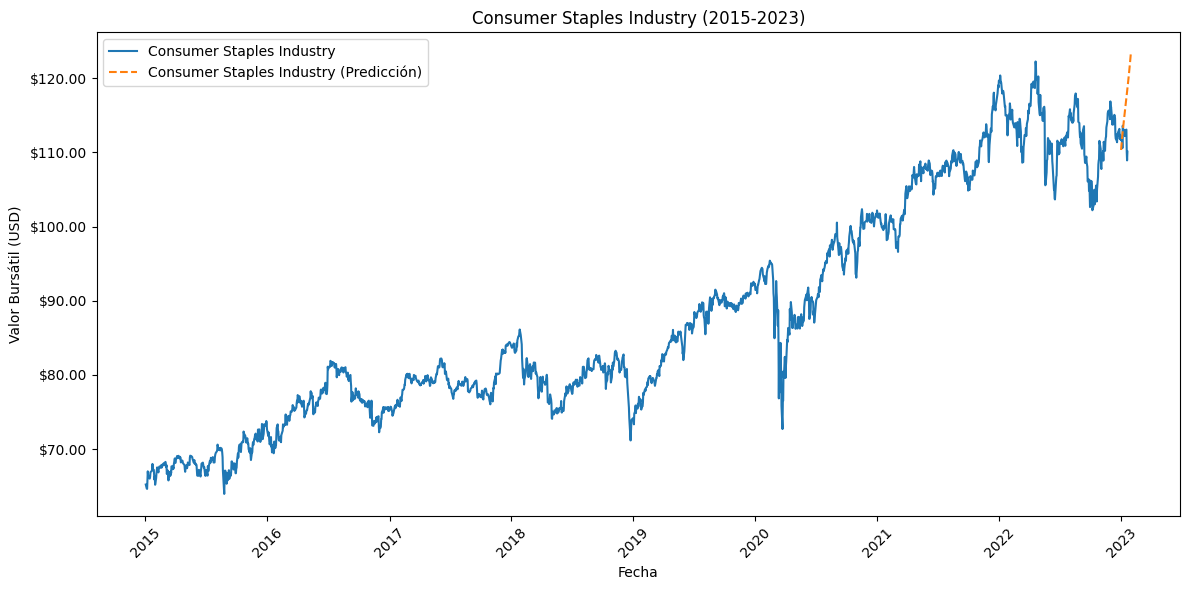

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Consumer Staples Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=30)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Consumer Staples Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Health Care Industry

Epoch 1/60
32/32 [==============================] - 7s 159ms/step - loss: 0.0167
Epoch 2/60
32/32 [==============================] - 4s 139ms/step - loss: 4.9813e-04
Epoch 3/60
32/32 [==============================] - 6s 175ms/step - loss: 3.6004e-04
Epoch 4/60
32/32 [==============================] - 4s 139ms/step - loss: 3.5752e-04
Epoch 5/60
32/32 [==============================] - 4s 139ms/step - loss: 3.5674e-04
Epoch 6/60
32/32 [==============================] - 6s 176ms/step - loss: 3.2359e-04
Epoch 7/60
32/32 [==============================] - 4s 139ms/step - loss: 3.1245e-04
Epoch 8/60
32/32 [==============================] - 5s 162ms/step - loss: 3.1411e-04
Epoch 9/60
32/32 [==============================] - 5s 148ms/step - loss: 3.0682e-04
Epoch 10/60
32/32 [==============================] - 4s 138ms/step - loss: 2.9070e-04
Epoch 11/60
32/32 [==============================] - 6s 176ms/step - loss: 3.0499e-04
Epoch 12/60
32/32 [==============================] - 4s 139ms/step 

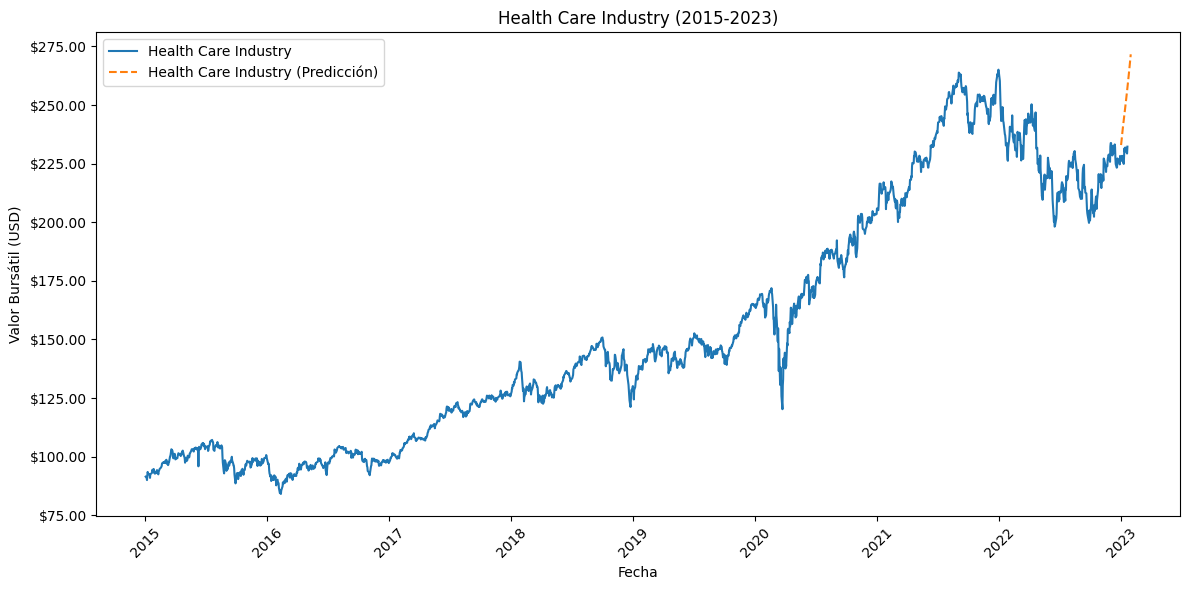

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Health Care Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=30)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Health Care Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Industrials Industry

Epoch 1/60
32/32 [==============================] - 7s 174ms/step - loss: 0.0233
Epoch 2/60
32/32 [==============================] - 4s 132ms/step - loss: 0.0011
Epoch 3/60
32/32 [==============================] - 4s 134ms/step - loss: 6.6172e-04
Epoch 4/60
32/32 [==============================] - 5s 172ms/step - loss: 6.1671e-04
Epoch 5/60
32/32 [==============================] - 4s 133ms/step - loss: 6.2519e-04
Epoch 6/60
32/32 [==============================] - 4s 137ms/step - loss: 5.4991e-04
Epoch 7/60
32/32 [==============================] - 5s 167ms/step - loss: 5.2846e-04
Epoch 8/60
32/32 [==============================] - 4s 133ms/step - loss: 5.3998e-04
Epoch 9/60
32/32 [==============================] - 5s 156ms/step - loss: 4.7744e-04
Epoch 10/60
32/32 [==============================] - 5s 147ms/step - loss: 4.8916e-04
Epoch 11/60
32/32 [==============================] - 4s 132ms/step - loss: 4.2182e-04
Epoch 12/60
32/32 [==============================] - 5s 170ms/step - lo

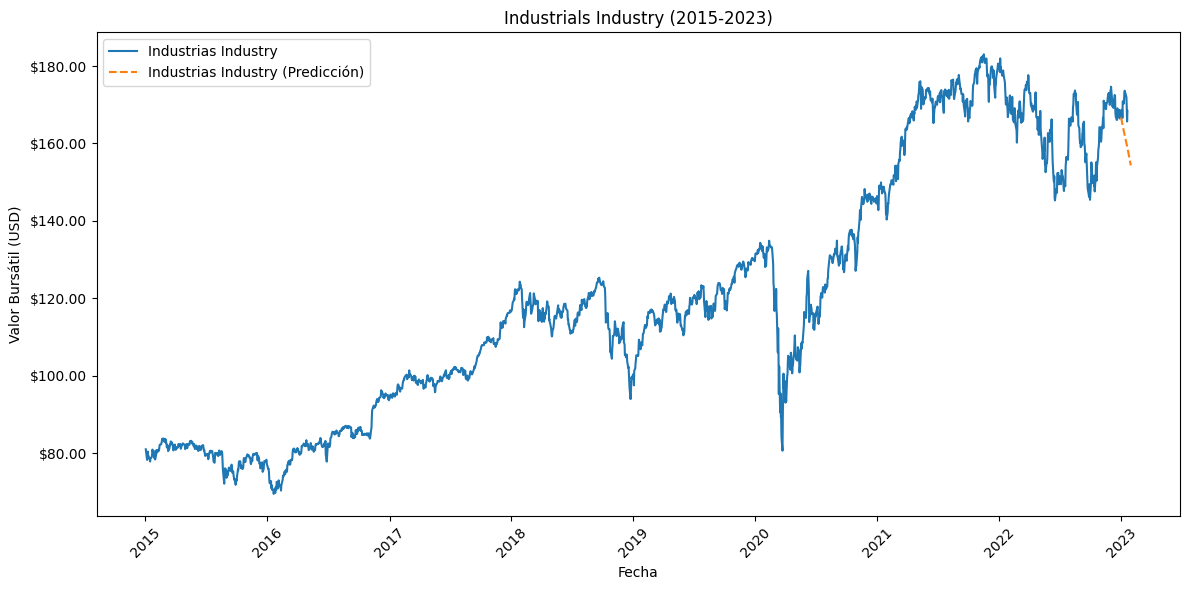

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Industrias Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=30)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Industrials Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Information Technology Industry

Epoch 1/60
32/32 [==============================] - 6s 136ms/step - loss: 0.0192
Epoch 2/60
32/32 [==============================] - 5s 145ms/step - loss: 4.6207e-04
Epoch 3/60
32/32 [==============================] - 5s 155ms/step - loss: 3.2217e-04
Epoch 4/60
32/32 [==============================] - 4s 133ms/step - loss: 2.6465e-04
Epoch 5/60
32/32 [==============================] - 5s 165ms/step - loss: 2.8454e-04
Epoch 6/60
32/32 [==============================] - 4s 136ms/step - loss: 2.8374e-04
Epoch 7/60
32/32 [==============================] - 4s 132ms/step - loss: 2.5493e-04
Epoch 8/60
32/32 [==============================] - 5s 173ms/step - loss: 2.9162e-04
Epoch 9/60
32/32 [==============================] - 4s 132ms/step - loss: 2.4973e-04
Epoch 10/60
32/32 [==============================] - 4s 135ms/step - loss: 2.4138e-04
Epoch 11/60
32/32 [==============================] - 5s 171ms/step - loss: 2.3071e-04
Epoch 12/60
32/32 [==============================] - 4s 132ms/step 

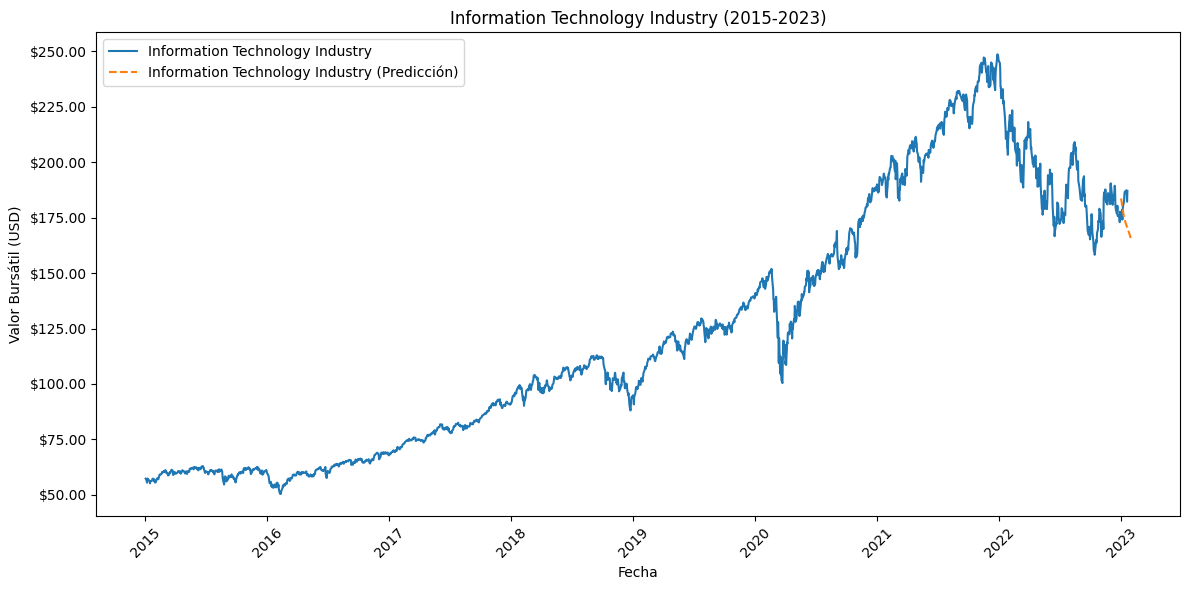

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Information Technology Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=30)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Information Technology Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Materials Industry

Epoch 1/60
32/32 [==============================] - 6s 143ms/step - loss: 0.0244
Epoch 2/60
32/32 [==============================] - 5s 144ms/step - loss: 8.7014e-04
Epoch 3/60
32/32 [==============================] - 6s 173ms/step - loss: 4.7393e-04
Epoch 4/60
32/32 [==============================] - 4s 140ms/step - loss: 5.0151e-04
Epoch 5/60
32/32 [==============================] - 6s 177ms/step - loss: 4.5434e-04
Epoch 6/60
32/32 [==============================] - 4s 139ms/step - loss: 4.2894e-04
Epoch 7/60
32/32 [==============================] - 5s 142ms/step - loss: 4.0615e-04
Epoch 8/60
32/32 [==============================] - 6s 179ms/step - loss: 4.3484e-04
Epoch 9/60
32/32 [==============================] - 4s 139ms/step - loss: 3.7406e-04
Epoch 10/60
32/32 [==============================] - 5s 150ms/step - loss: 3.5087e-04
Epoch 11/60
32/32 [==============================] - 5s 164ms/step - loss: 3.5255e-04
Epoch 12/60
32/32 [==============================] - 4s 138ms/step 

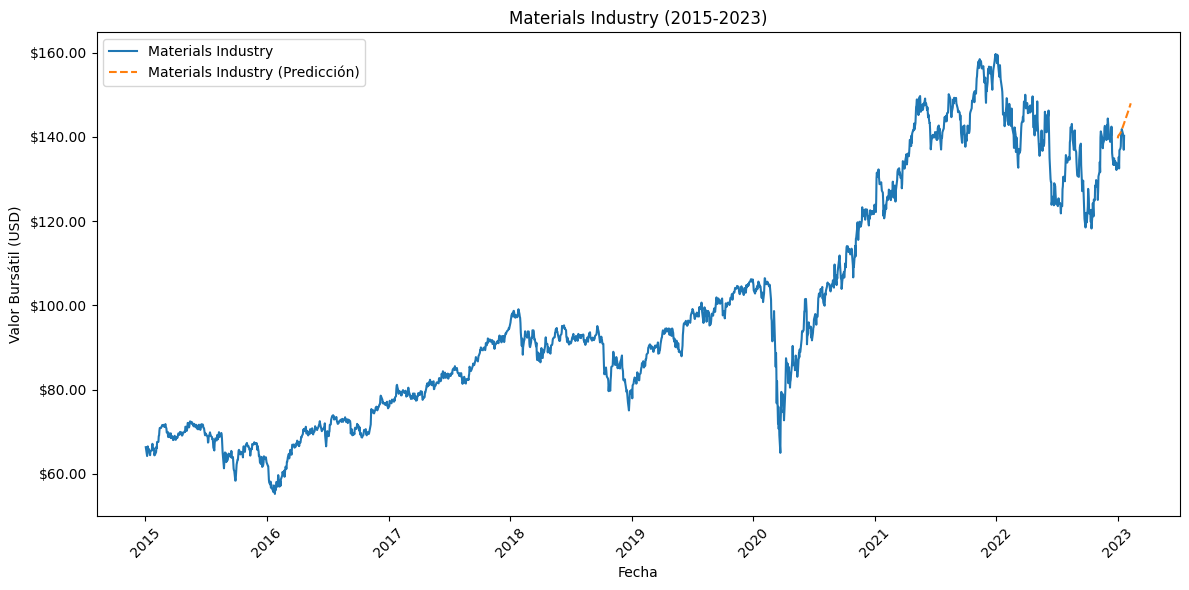

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Materials Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(40):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=40)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Materials Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Real Estate Industry

Epoch 1/60
32/32 [==============================] - 7s 160ms/step - loss: 0.0121
Epoch 2/60
32/32 [==============================] - 4s 136ms/step - loss: 8.1075e-04
Epoch 3/60
32/32 [==============================] - 6s 176ms/step - loss: 7.5796e-04
Epoch 4/60
32/32 [==============================] - 4s 135ms/step - loss: 7.4557e-04
Epoch 5/60
32/32 [==============================] - 4s 138ms/step - loss: 6.4133e-04
Epoch 6/60
32/32 [==============================] - 6s 176ms/step - loss: 6.0367e-04
Epoch 7/60
32/32 [==============================] - 4s 138ms/step - loss: 5.9778e-04
Epoch 8/60
32/32 [==============================] - 4s 138ms/step - loss: 5.5086e-04
Epoch 9/60
32/32 [==============================] - 6s 175ms/step - loss: 5.0471e-04
Epoch 10/60
32/32 [==============================] - 5s 142ms/step - loss: 5.3719e-04
Epoch 11/60
32/32 [==============================] - 6s 175ms/step - loss: 4.8421e-04
Epoch 12/60
32/32 [==============================] - 4s 137ms/step 

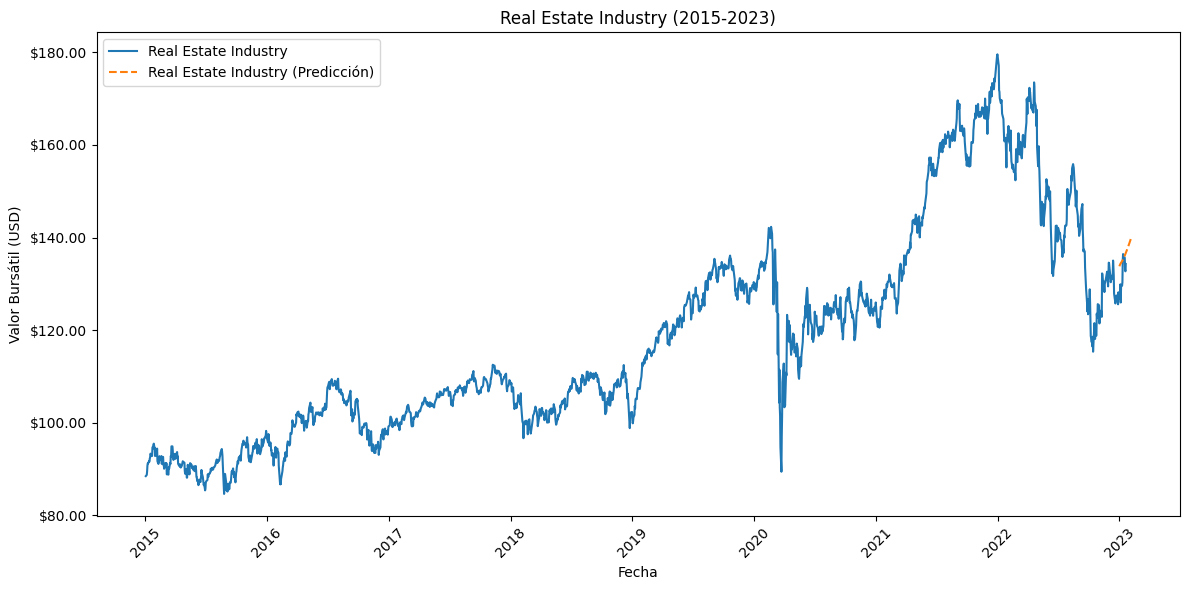

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Real Estate Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(35):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=35)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Real Estate Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Communication Services Industry

Epoch 1/60
32/32 [==============================] - 9s 234ms/step - loss: 0.0222
Epoch 2/60
32/32 [==============================] - 8s 242ms/step - loss: 5.1917e-04
Epoch 3/60
32/32 [==============================] - 8s 256ms/step - loss: 3.8284e-04
Epoch 4/60
32/32 [==============================] - 7s 219ms/step - loss: 3.7135e-04
Epoch 5/60
32/32 [==============================] - 8s 259ms/step - loss: 3.9588e-04
Epoch 6/60
32/32 [==============================] - 7s 230ms/step - loss: 3.5109e-04
Epoch 7/60
32/32 [==============================] - 8s 248ms/step - loss: 3.5897e-04
Epoch 8/60
32/32 [==============================] - 8s 256ms/step - loss: 3.4700e-04
Epoch 9/60
32/32 [==============================] - 7s 222ms/step - loss: 3.7221e-04
Epoch 10/60
32/32 [==============================] - 8s 260ms/step - loss: 4.1011e-04
Epoch 11/60
32/32 [==============================] - 7s 226ms/step - loss: 3.8184e-04
Epoch 12/60
32/32 [==============================] - 8s 252ms/step 

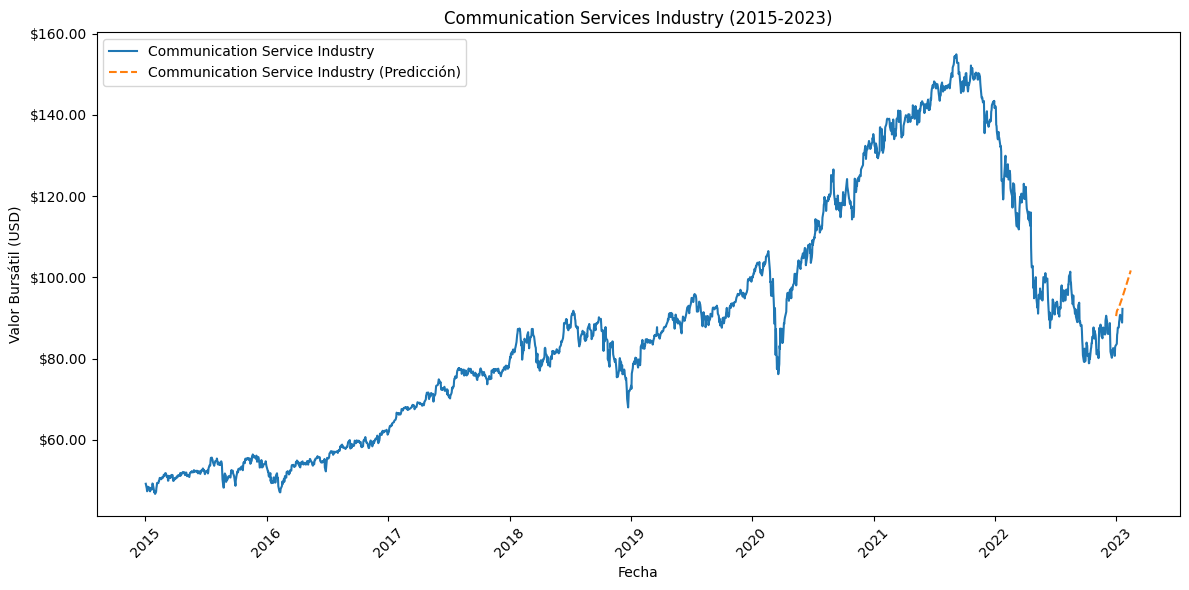

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Communication Service Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(400, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(45):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=45)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Communication Services Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Utilities Industry

Epoch 1/60
32/32 [==============================] - 16s 416ms/step - loss: 0.0213
Epoch 2/60
32/32 [==============================] - 9s 296ms/step - loss: 0.0016
Epoch 3/60
32/32 [==============================] - 14s 430ms/step - loss: 0.0014
Epoch 4/60
32/32 [==============================] - 13s 408ms/step - loss: 0.0013
Epoch 5/60
32/32 [==============================] - 9s 276ms/step - loss: 0.0012
Epoch 6/60
32/32 [==============================] - 10s 314ms/step - loss: 0.0011
Epoch 7/60
32/32 [==============================] - 10s 319ms/step - loss: 0.0012
Epoch 8/60
32/32 [==============================] - 10s 319ms/step - loss: 0.0011
Epoch 9/60
32/32 [==============================] - 9s 271ms/step - loss: 0.0010
Epoch 10/60
32/32 [==============================] - 10s 312ms/step - loss: 9.1262e-04
Epoch 11/60
32/32 [==============================] - 10s 311ms/step - loss: 8.9200e-04
Epoch 12/60
32/32 [==============================] - 10s 310ms/step - loss: 8.3051e-04
Epoc

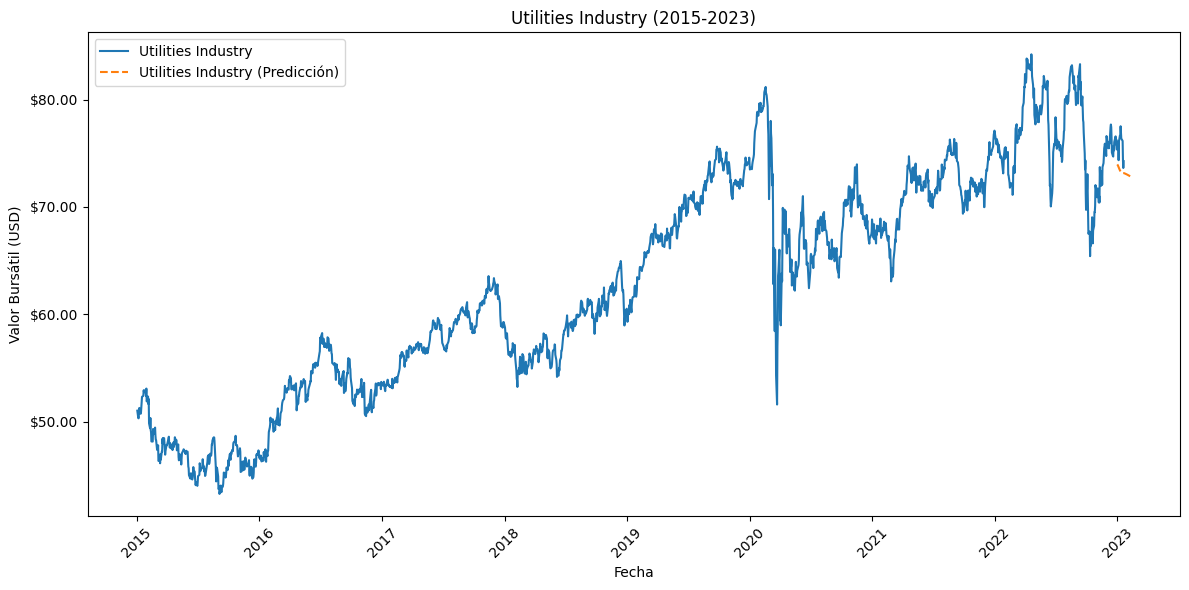

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Utilities Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(450, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(40):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=40)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Utilities Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Financials Industry

Epoch 1/60
32/32 [==============================] - 15s 370ms/step - loss: 0.0193
Epoch 2/60
32/32 [==============================] - 7s 228ms/step - loss: 8.4689e-04
Epoch 3/60
32/32 [==============================] - 9s 270ms/step - loss: 5.4651e-04
Epoch 4/60
32/32 [==============================] - 8s 258ms/step - loss: 5.1675e-04
Epoch 5/60
32/32 [==============================] - 8s 240ms/step - loss: 4.9623e-04
Epoch 6/60
32/32 [==============================] - 8s 264ms/step - loss: 4.9374e-04
Epoch 7/60
32/32 [==============================] - 7s 228ms/step - loss: 5.1994e-04
Epoch 8/60
32/32 [==============================] - 8s 259ms/step - loss: 4.7148e-04
Epoch 9/60
32/32 [==============================] - 8s 263ms/step - loss: 4.2058e-04
Epoch 10/60
32/32 [==============================] - 7s 226ms/step - loss: 4.1294e-04
Epoch 11/60
32/32 [==============================] - 9s 269ms/step - loss: 4.0915e-04
Epoch 12/60
32/32 [==============================] - 8s 241ms/step

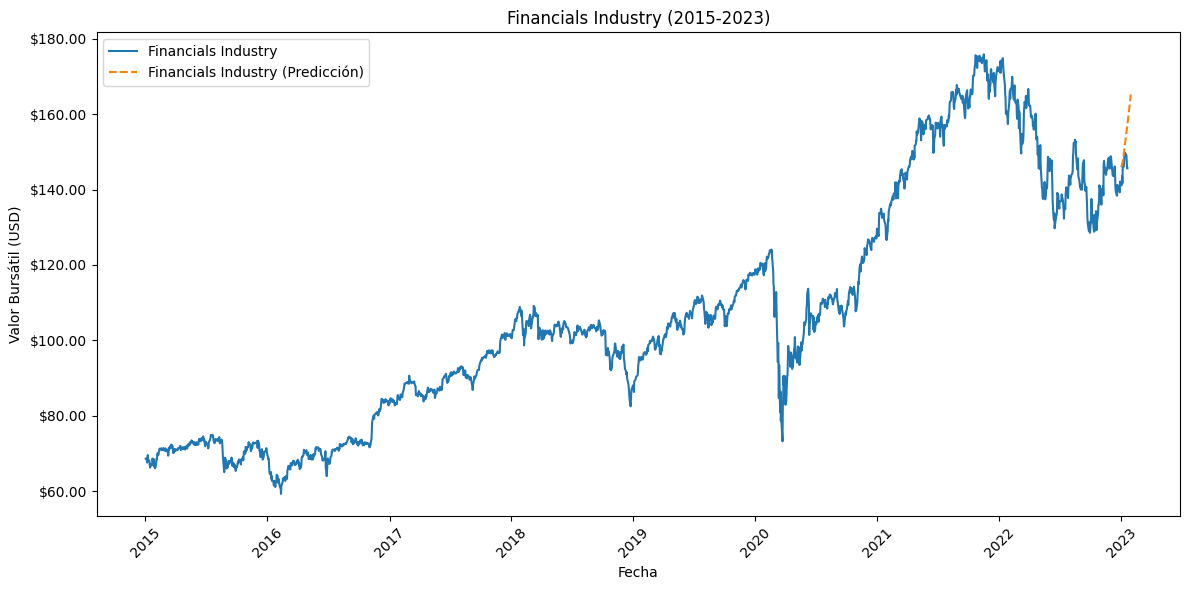

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Financials Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(400, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=30)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Financials Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Energy Industry

Epoch 1/60
32/32 [==============================] - 8s 139ms/step - loss: 0.0442
Epoch 2/60
32/32 [==============================] - 5s 148ms/step - loss: 0.0028
Epoch 3/60
32/32 [==============================] - 6s 170ms/step - loss: 0.0012
Epoch 4/60
32/32 [==============================] - 4s 141ms/step - loss: 0.0010
Epoch 5/60
32/32 [==============================] - 6s 177ms/step - loss: 8.7179e-04
Epoch 6/60
32/32 [==============================] - 5s 141ms/step - loss: 8.5061e-04
Epoch 7/60
32/32 [==============================] - 5s 144ms/step - loss: 7.7804e-04
Epoch 8/60
32/32 [==============================] - 6s 180ms/step - loss: 6.6533e-04
Epoch 9/60
32/32 [==============================] - 5s 142ms/step - loss: 6.6881e-04
Epoch 10/60
32/32 [==============================] - 5s 154ms/step - loss: 6.2893e-04
Epoch 11/60
32/32 [==============================] - 5s 153ms/step - loss: 5.3655e-04
Epoch 12/60
32/32 [==============================] - 4s 138ms/step - loss: 5.08

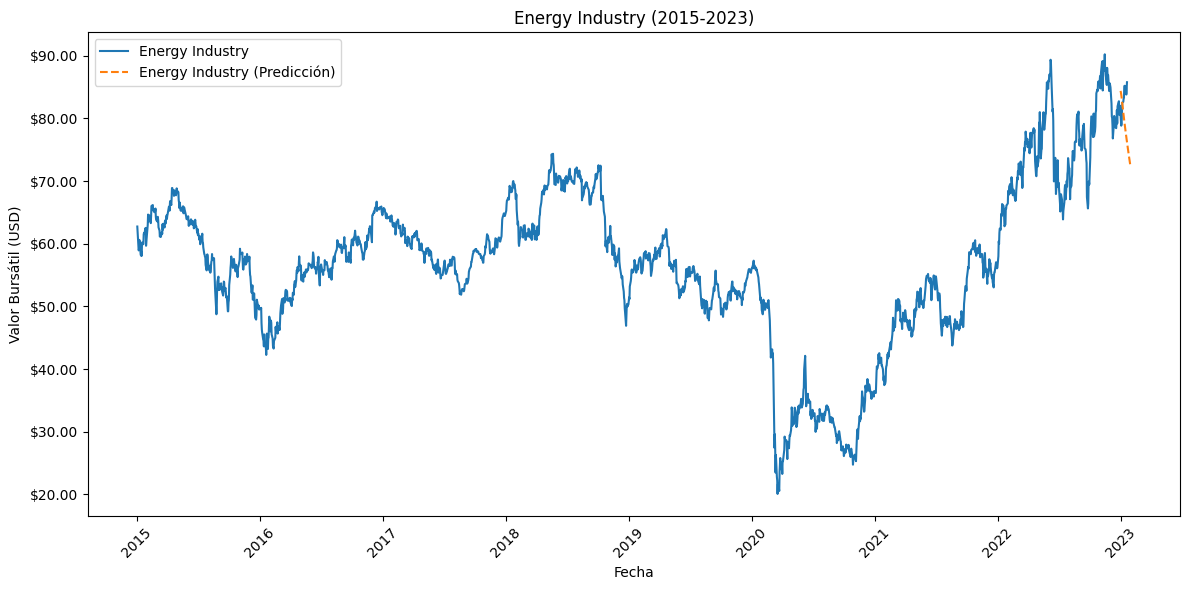

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
data = pd.read_excel('/content/Industry SP500 Mean.xlsx', parse_dates=['Date'])

# Seleccionar las columnas con los valores de las empresas
company_columns = ['Energy Industry' ]

# Obtener los valores de las empresas como una matriz 2D
values = data[company_columns].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Crear conjuntos de datos de entrada y salida
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[i + window_size, :])
    return np.array(X), np.array(y)

window_size = 30  # Tamaño de la ventana para el conjunto de datos de entrada
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(300, activation='relu', input_shape=(window_size, len(company_columns))),
    tf.keras.layers.Dense(len(company_columns))
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=60, batch_size=50)

# Realizar predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertir la normalización de los datos
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Calcular el error RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE (Entrenamiento):", train_rmse)
print("RMSE (Prueba):", test_rmse)

# Obtener la ventana de datos de prueba más reciente
last_window = scaled_values[-window_size:, :]

# Realizar predicción de los próximos 50 días
future_predictions = []
for _ in range(30):
    future_prediction = model.predict(last_window.reshape(1, window_size, len(company_columns)))
    future_predictions.append(future_prediction)
    last_window = np.append(last_window[1:, :], future_prediction, axis=0)

# Invertir la normalización de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, len(company_columns)))

# Crear las fechas para los próximos 50 días a partir del 1 de enero de 2023
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start=start_date, periods=30)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_columns):
    plt.plot(data['Date'], values[:, i], label=company)
    plt.plot(date_range, future_predictions[:, i], label=f'{company} (Predicción)', linestyle='--')

# Función para formatear los valores en dólares
def dollar_format(x, pos):
    return f'${x:.2f}'

# Configurar el formateador de ejes para mostrar valores en dólares
formatter = ticker.FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Fecha')
plt.ylabel('Valor Bursátil (USD)')
plt.title('Energy Industry (2015-2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()